Data Science Nigeria AI Bootcamp 2021

In [1]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping


Read the Data and view.

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [3]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [4]:
#we would need to change the Dtype of some columns later
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

Explanatory Data Analysis

In [5]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.isna().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [7]:
train['Disposable_Income'].fillna(train['Disposable_Income'].mean(), inplace=True)

In [9]:
#you could CONCAT the train & test for joint pre-processing
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1568 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Disposable_Income'>

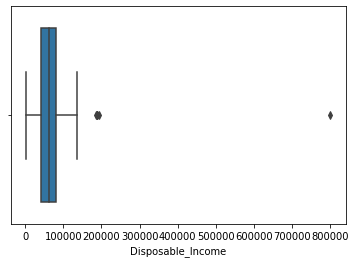

In [10]:
# this column has some outliers that make the range too wide
sns.boxplot(train['Disposable_Income'])

<AxesSubplot:>

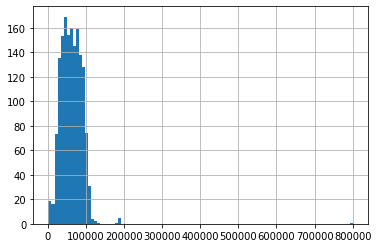

In [11]:
train['Disposable_Income'].hist(bins=100)

In [12]:
'''
For the Disposable Column table, mean is 62381.18659793814. Outliers go as high as 799,999.
The 75th percentile is 81493.2. We would cap the max values higher than 200k to the 99th percentile.
The 99th percentile is 112897.27200000001
'''

#let's cap the 'Disposable Income' column
percentile_99 = train['Disposable_Income'].quantile(.99)
train['Disposable_Income'] = train['Disposable_Income'].map(lambda x: percentile_99 if x > 200000 else x)
test['Disposable_Income'] = test['Disposable_Income'].map(lambda x: percentile_99 if x > 200000 else x)
train['Disposable_Income'].describe()

count      1568.000000
mean      61942.911103
std       25950.304744
min        2076.000000
25%       41801.400000
50%       61391.400000
75%       81055.200000
max      192963.600000
Name: Disposable_Income, dtype: float64

<AxesSubplot:>

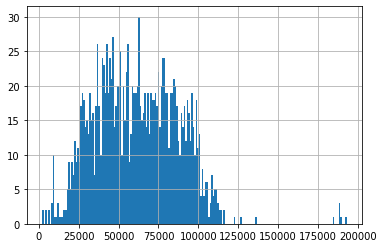

In [13]:
#we can now better view the data this way, as values above 100k are capped
train['Disposable_Income'].hist(bins=200)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Disposable_Income'>

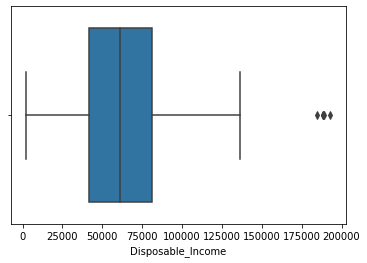

In [14]:
#the Data rabge us 
sns.boxplot(train['Disposable_Income'])

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Single'),
  Text(3, 0, 'Married'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Alone'),
  Text(6, 0, 'Absurd'),
  Text(7, 0, 'YOLO')])

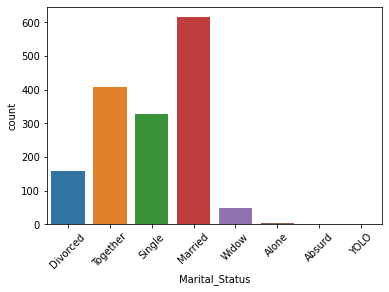

In [15]:
sns.countplot(train['Marital_Status'], orient='v') 
plt.xticks(rotation=45)

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Graduation'),
  Text(1, 0, '2n Cycle'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'PhD'),
  Text(4, 0, 'Basic')])

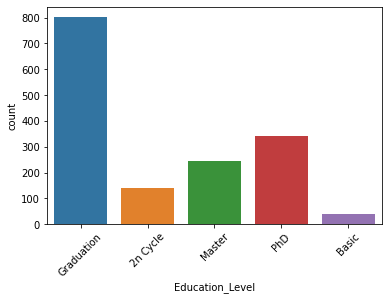

In [16]:
sns.countplot(train['Education_Level']) 
plt.xticks(rotation=45)

In [17]:
#extract the month column and Year Columns
train['Month'] = pd.DatetimeIndex(train['Date_Customer']).month
test['Month'] = pd.DatetimeIndex(test['Date_Customer']).month

train['Year'] = pd.DatetimeIndex(train['Date_Customer']).year
test['Year'] = pd.DatetimeIndex(test['Date_Customer']).year

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Month of User Enrollment')

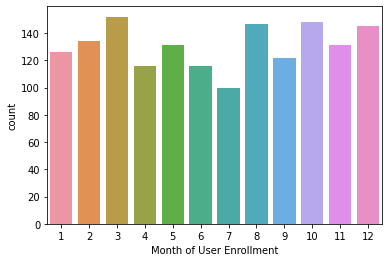

In [18]:
#month of User enrollment with the company
sns.countplot(train['Month']) 
plt.xlabel('Month of User Enrollment')

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year of User Enrollment')

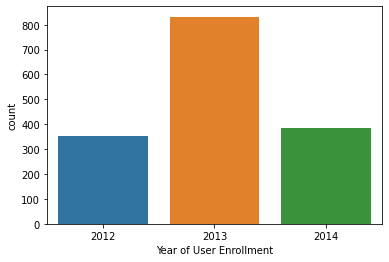

In [19]:
#year of User enrollment
sns.countplot(train['Year']) 
plt.xlabel('Year of User Enrollment')

In [20]:
#these columns are highly imbalanced
print('Any_Complains: \n', train['Any_Complain'].value_counts())
print('\n')
print('Cmp1Accepted: \n', train['Cmp1Accepted'].value_counts())
print('\n')
print('Cmp3Accepted: \n', train['Cmp3Accepted'].value_counts())
print('\n')
print('Cmp4Accepted: \n', train['Cmp4Accepted'].value_counts())
print('\n')
print('Cmp5Accepted: \n', train['Cmp5Accepted'].value_counts())
print('\n')

Any_Complains: 
 0    1555
1      13
Name: Any_Complain, dtype: int64


Cmp1Accepted: 
 0    1467
1     101
Name: Cmp1Accepted, dtype: int64


Cmp3Accepted: 
 0    1454
1     114
Name: Cmp3Accepted, dtype: int64


Cmp4Accepted: 
 0    1454
1     114
Name: Cmp4Accepted, dtype: int64


Cmp5Accepted: 
 0    1442
1     126
Name: Cmp5Accepted, dtype: int64




In [21]:
# 'EDUCATION-LEVEL' has equal values for both Train & Test
print('Unique values for EDUCATION LEVEL:', train['Education_Level'].unique())
print('\n')
print('Unique values for EDUCATION LEVEL:', test['Education_Level'].unique())

Unique values for EDUCATION LEVEL: ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']


Unique values for EDUCATION LEVEL: ['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']


In [22]:
# 'MARITAL-STATUS' has extras in the Train
print('Unique values for MARITAL STATUS:', train['Marital_Status'].unique())
print('\n')
print('Unique values for MARITAL STATUS:', test['Marital_Status'].unique())

Unique values for MARITAL STATUS: ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


Unique values for MARITAL STATUS: ['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


<AxesSubplot:>

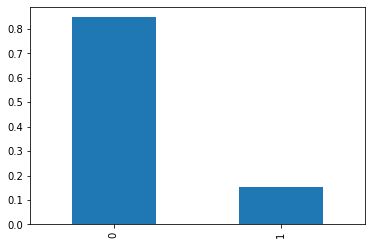

In [23]:
#the training set is imbalanced
#the NEGATIVE response makes 80% of the target value, while the POSITIVE response makes up about 20%
train['Response'].value_counts(normalize=True).plot(kind='bar')

In [24]:
#cut YEAR_OF_BIRTH & DISPOSABLE_INCOME into bins
birth_bins = [1880, 1900, 1920, 1940, 1960, 1980, 2000]
birth_labels = [1, 2, 3, 4, 5, 6] #category 1-6

income_bins = [2000, 10000, 20000, 35000, 50000, 80000, 100000, 120000, 150000, 200000]
income_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9] #categories 1-9

train['Year_of_Birth'] = pd.cut(train['Year_of_Birth'], birth_bins, labels=birth_labels)
train['Disposable_Income'] = pd.cut(train['Disposable_Income'], income_bins, labels=income_labels)

test['Year_of_Birth'] = pd.cut(test['Year_of_Birth'], birth_bins, labels=birth_labels)
test['Disposable_Income'] = pd.cut(test['Disposable_Income'], income_bins, labels=income_labels)

In [25]:
test['Disposable_Income'].fillna(method='ffill', inplace=True)

In [26]:
train['Year_of_Birth'] = train['Year_of_Birth'].astype(int)
train['Disposable_Income'] = train['Disposable_Income'].astype(int)

test['Year_of_Birth'] = test['Year_of_Birth'].astype(int)
test['Disposable_Income'] = test['Disposable_Income'].astype(int)

In [27]:
#drop the  ID and Date_Customer Columns
target = train['Response']

train.drop(['ID', 'Date_Customer', 'Response'], inplace=True, axis=1)
test.drop(['ID', 'Date_Customer'], inplace=True, axis=1)

In [28]:
#encode the 'education_ordinal' & 'Marital_Status' columns
education_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=10).fit(train['Education_Level'].values.reshape(-1, 1))
marital_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=10).fit(train['Marital_Status'].values.reshape(-1, 1))

train['Education_Level'] = education_ordinal.transform(train['Education_Level'].values.reshape(-1, 1))
train['Marital_Status'] = marital_ordinal.transform(train['Marital_Status'].values.reshape(-1, 1))

test['Education_Level'] = education_ordinal.transform(test['Education_Level'].values.reshape(-1, 1))
test['Marital_Status'] = marital_ordinal.transform(test['Marital_Status'].values.reshape(-1, 1))

In [29]:
print('Education Level codes: \n{}'.format(education_ordinal.categories_))
print('\n')
print('Marital Status codes: \n{}'.format(marital_ordinal.categories_))

Education Level codes: 
[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)]


Marital Status codes: 
[array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', 'YOLO'], dtype=object)]


In [30]:
train['Disposable_Income'] = train['Disposable_Income'].astype(int)
train['Education_Level'] = train['Education_Level'].astype(int)

test['Disposable_Income'] = test['Disposable_Income'].astype(int)
test['Education_Level'] = test['Education_Level'].astype(int)

In [31]:
rnd_clf = RandomForestClassifier(n_estimators=200, criterion='entropy').fit(train, target)
feature_importances = rnd_clf.feature_importances_ *100
col_names = train.columns

#columns with values below 2.0 would be dropped as they would not contribute much to our model
importance = sorted(zip(feature_importances, col_names), reverse=True)
pd.Series(importance)

0                     (10.68533612224501, Recency)
1      (7.751605075283371, Amount_on_MeatProducts)
2         (7.147924691239709, Amount_on_GoldProds)
3            (7.0029801103393865, Amount_on_Wines)
4            (4.973175568777314, CatalogPurchases)
5                (4.845382371735883, Cmp5Accepted)
6     (4.671014135455203, Amount_on_SweetProducts)
7               (4.59695841200924, WebVisitsMonth)
8      (4.577582716881128, Amount_on_FishProducts)
9              (4.514874928704938, StorePurchases)
10           (4.472918858617072, Amount_on_Fruits)
11               (4.426069742064176, Cmp1Accepted)
12               (3.968581488315728, Cmp3Accepted)
13                     (3.7124904939520262, Month)
14               (3.431176928855252, WebPurchases)
15                       (3.351682197875731, Year)
16            (2.8313049347019548, Marital_Status)
17      (2.7608584198221493, Discounted_Purchases)
18           (2.5712014127317326, Education_Level)
19         (2.2152679964867614,

In [32]:
#drop the values with '< 3.0'
train.drop(['No_of_Teen_in_home', 'Disposable_Income', 'Cmp4Accepted', 'Year_of_Birth', 'No_of_Kids_in_home', 'Cmp2Accepted', 'Any_Complain', 'Discounted_Purchases', 'Marital_Status', 'Education_Level', 'Disposable_Income'], axis=1, inplace=True)
test.drop(['No_of_Teen_in_home', 'Disposable_Income', 'Cmp4Accepted', 'Year_of_Birth', 'No_of_Kids_in_home', 'Cmp2Accepted', 'Any_Complain', 'Discounted_Purchases', 'Marital_Status', 'Education_Level', 'Disposable_Income'], axis=1, inplace=True)


train.columns

Index(['Recency', 'WebPurchases', 'CatalogPurchases', 'StorePurchases',
       'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts',
       'Amount_on_FishProducts', 'Amount_on_SweetProducts',
       'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp5Accepted',
       'Cmp1Accepted', 'Month', 'Year'],
      dtype='object')

In [33]:
train.shape, test.shape

((1568, 16), (672, 16))

In [34]:
#split the dataset into Train & Testing
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target)

In [35]:
# undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(train, target)

In [36]:
#perform OVER-SAMPLING HERE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(train, target)

In [37]:
target_cat = target.astype('category')
target_cat.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [38]:
ss = StandardScaler().fit(train)

train_ss = ss.transform(train)
test_ss = ss.transform(test)

X_smote_ss = ss.transform(X_smote)
X_res_ss = ss.transform(X_res)

X_train_ss, X_val_ss, y_train_ss, y_val_ss = train_test_split(train_ss, target_cat, test_size=0.2, stratify=target_cat)

In [68]:
X_train_ss.shape

(1254, 16)

In [99]:
model = Sequential()
model.add(Flatten(input_shape=(16,)))
# model.add(Dense(16, activation='LeakyReLU'))
model.add(Dense(16, activation='LeakyReLU'))
model.add(Dense(16, activation='LeakyReLU'))
model.add(Dropout(0.8))
model.add(Dense(8, activation='LeakyReLU'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.002), metrics=['accuracy'])
# es = EarlyStopping(monitor='accuracy', patience=50)
history = model.fit(x=X_train_ss, y=y_train_ss, epochs=700, verbose=0, batch_size=32)
#try 16, 8, 1

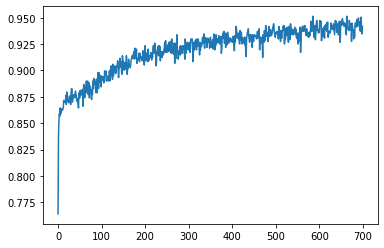

In [100]:
plt.plot(history.history['accuracy'])

In [ ]:
# def build_model(hp):
#     model = Sequential()
#     model.add(Flatten(input_shape=(16,)))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 0.00001, 0.004])
#     opt = optimizers.Adam(learning_rate=hp_learning_rate)
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#     return model
    
# tuner = RandomSearch(build_model, objective='accuracy', max_trials=4, executions_per_trial=1, directory='mydir')

# tuner.search(x=train_ss, y=target_cat, epochs=500, verbose=0, batch_size=16)

In [ ]:
# tuner.get_best_hyperparameters(1)[0].values

In [101]:
predictions = model.predict(test_ss)

def pred(x):
    col = []
    for i in x:
        # col.append(predictions[i].argmax())
        if i > 0.5:
            col.append(1)
        else:
            col.append(0)
    return col

x = pred(predictions)

np.unique(x, return_counts=True)


(array([0, 1]), array([591,  81], dtype=int64))

In [102]:
# #save the model
sample = pd.read_csv('SampleSubmission.csv')

sample['Response'] = x
sample.to_csv('xxx.csv', index=False)